In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = "C:\mlproject"

In [12]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
        

In [13]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [14]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 39s 39ms/step - loss: 2.1044 - accuracy: 0.4641 - val_loss: 0.5738 - val_accuracy: 0.8424
Epoch 2/15
981/981 [==============================] - 44s 45ms/step - loss: 0.7700 - accuracy: 0.7684 - val_loss: 0.2883 - val_accuracy: 0.9175
Epoch 3/15
981/981 [==============================] - 46s 47ms/step - loss: 0.5074 - accuracy: 0.8484 - val_loss: 0.1708 - val_accuracy: 0.9563
Epoch 4/15
981/981 [==============================] - 44s 45ms/step - loss: 0.3667 - accuracy: 0.8891 - val_loss: 0.2415 - val_accuracy: 0.9422
Epoch 5/15
981/981 [==============================] - 45s 46ms/step - loss: 0.3023 - accuracy: 0.9102 - val_loss: 0.0961 - val_accuracy: 0.9717
Epoch 6/15
981/981 [==============================] - 43s 44ms/step - loss: 0.2634 - accuracy: 0.9233 - val_loss: 0.0996 - val_accuracy: 0.9736
Epoch 7/15
981/981 [==============================] - 46s 47ms/step - loss: 0.2514 - accuracy: 0.9267 - val_loss: 0.0776 - val_accuracy:

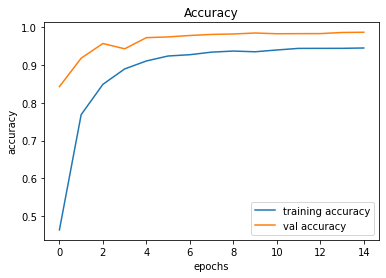

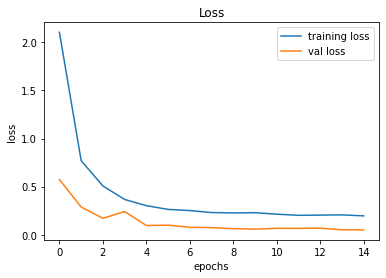

In [16]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("C:\mlproject\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    path="C:\mlproject"
    img=os.path.join(path,img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)



In [25]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [26]:
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
import numpy as np
a = predictions
predictions=np.argmax(a, axis=1)

In [30]:
predictions=np.array(predictions)

In [31]:
accuracy_score(labels,predictions)

0.938479809976247

In [33]:
model.save('traffic_classification.h5')